In [1]:
# If there is an outlier found -(only applicable for numerical data)
# approach - Transformation approach
# 1) sqrt - no need to remove data from your dataset
# 2) cube root - no need to remove data from your dataset
# 3) log transformation - no need to remove data from your dataset(base10) -dont use log2
# 4) general approach (q1-1.5*iqr or q3+1.5*iqr) - no need to remove data from your dataset

In [1]:
import os # os - operating system
os.getcwd() # get current working directory
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
import imblearn

In [3]:
df = pd.read_excel('Data_preprocessing.xlsx',sheet_name='Sheet2' )

In [4]:
df

,Department,Age,Experience
0,HR,21,1
1,HR,33,12
2,IT,35,12
3,IT,36,12
4,HR,34,11
5,IT,33,13
6,Marketing,34,12
7,HR,32,10
8,Marketing,31,2
9,IT,55,35


In [5]:
q1 = df.quantile(.25)
q3 = df.quantile(.75)
iqr = q3-q1

In [6]:
q1

Age           32.25
Experience    10.25
Name: 0.25, dtype: float64

In [7]:
q3

Age           34.75
Experience    12.00
Name: 0.75, dtype: float64

In [8]:
iqr

Age           2.50
Experience    1.75
dtype: float64

In [9]:
df[~((df < (q1 - 1.5*iqr)) | (df > (q3 + 1.5*iqr))).any(axis=1)]
# ~ is to comparison 
# | Or condition
# axis =1 ==> column wise need to check outlier
# if we dont put tilda in command it will show outlier values . To remove outlier values from df we use tilda sign

<ipython-input-9-74a805a2f8dd>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df[~((df < (q1 - 1.5*iqr)) | (df > (q3 + 1.5*iqr))).any(axis=1)]
<ipython-input-9-74a805a2f8dd>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df[~((df < (q1 - 1.5*iqr)) | (df > (q3 + 1.5*iqr))).any(axis=1)]


,Department,Age,Experience
1,HR,33,12
2,IT,35,12
3,IT,36,12
4,HR,34,11
5,IT,33,13
6,Marketing,34,12
7,HR,32,10


In [12]:
def outlier_treatment(dataframe):
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3 - Q1
    df_rem_out = dataframe[~((dataframe < (Q1 - 1.5*IQR)) | (dataframe > (Q3+1.5*IQR))).any(axis=1)]
    return df_rem_out

In [13]:
outlier_treatment(df)

<ipython-input-12-23187edc73ae>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_rem_out = dataframe[~((dataframe < (Q1 - 1.5*IQR)) | (dataframe > (Q3+1.5*IQR))).any(axis=1)]
<ipython-input-12-23187edc73ae>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_rem_out = dataframe[~((dataframe < (Q1 - 1.5*IQR)) | (dataframe > (Q3+1.5*IQR))).any(axis=1)]


,Department,Age,Experience
1,HR,33,12
2,IT,35,12
3,IT,36,12
4,HR,34,11
5,IT,33,13
6,Marketing,34,12
7,HR,32,10


In [ ]:
# Squareroot transformation - If stakeholder says we dont want to remove the outliers then we use the transformation data
to minimise error

In [14]:
df.iloc[:,1:3] = np.sqrt(df.iloc[:,1:3])
df

,Department,Age,Experience
0,HR,4.582576,1.000000
1,HR,5.744563,3.464102
2,IT,5.916080,3.464102
3,IT,6.000000,3.464102
4,HR,5.830952,3.316625
5,IT,5.744563,3.605551
6,Marketing,5.830952,3.464102
7,HR,5.656854,3.162278
8,Marketing,5.567764,1.414214
9,IT,7.416198,5.916080


In [15]:
# Cube root
df.iloc[:,1:3] = np.cbrt(df.iloc[:,1:3])
df

,Department,Age,Experience
0,HR,1.661001,1.000000
1,HR,1.790959,1.513086
2,IT,1.808609,1.513086
3,IT,1.817121,1.513086
4,HR,1.799892,1.491301
5,IT,1.790959,1.533406
6,Marketing,1.799892,1.513086
7,HR,1.781797,1.467799
8,Marketing,1.772394,1.122462
9,IT,1.950116,1.808609


In [16]:
# Log transformation 

df.iloc[:,1:3] = np.log10(df.iloc[:,1:3])
df

,Department,Age,Experience
0,HR,0.220370,0.000000
1,HR,0.253086,0.179864
2,IT,0.257345,0.179864
3,IT,0.259384,0.179864
4,HR,0.255246,0.173565
5,IT,0.253086,0.185657
6,Marketing,0.255246,0.179864
7,HR,0.250858,0.166667
8,Marketing,0.248560,0.050172
9,IT,0.290060,0.257345


<AxesSubplot:ylabel='Age'>

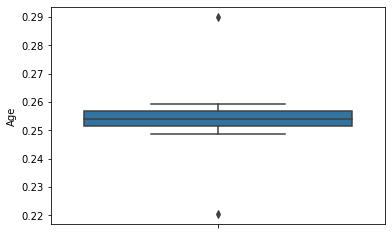

In [17]:
sns.boxplot(y = 'Age', data=df)

In [ ]:
# When to use square root, cube root, log etc
# here in below example log looks more appropriate as less variance is shown

In [18]:
abc = [5000,20000,25000,60000,15000000]
newdata = np.array(abc)

print(newdata)

[    5000    20000    25000    60000 15000000]


In [19]:
np.sqrt(newdata)

array([  70.71067812,  141.42135624,  158.11388301,  244.94897428,
       3872.98334621])

In [21]:
np.cbrt(newdata)

array([ 17.09975947,  27.14417617,  29.24017738,  39.14867641,
       246.62120743])

In [22]:
np.log10(newdata)

array([3.69897   , 4.30103   , 4.39794001, 4.77815125, 7.17609126])

In [ ]:
# When Log is not good- check the variable type and decide

In [23]:
age = [0,20,25,30,35,40,95]
age1 = np.array(age)

In [24]:
np.log(age1)
# Getting infinity cannot use log here 

<ipython-input-24-fba124f18bd7>:1: RuntimeWarning: divide by zero encountered in log
  np.log(age1)


array([      -inf, 2.99573227, 3.21887582, 3.40119738, 3.55534806,
       3.68887945, 4.55387689])

In [25]:
np.sqrt(age1)

array([0.        , 4.47213595, 5.        , 5.47722558, 5.91607978,
       6.32455532, 9.74679434])